## Data Loading and Exploration

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_1=pd.read_csv('//content/drive/MyDrive/archive/mitbih_train.csv', header=None)
df_2=pd.read_csv('/content/drive/MyDrive/archive/mitbih_test.csv', header=None)
df = pd.concat([df_1,df_2],axis=0)

In [7]:
print(df.shape)

(109446, 188)


In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print(df[187].unique())

[0. 1. 2. 3. 4.]


There are lables of the dataset, the column 187 are the label, the label we have here:

- 0: N
- 1: S
- 2: V
- 3: F
- 4: Q

In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X.shape, y.shape)

(109446, 187) (109446,)


## Data Visualization

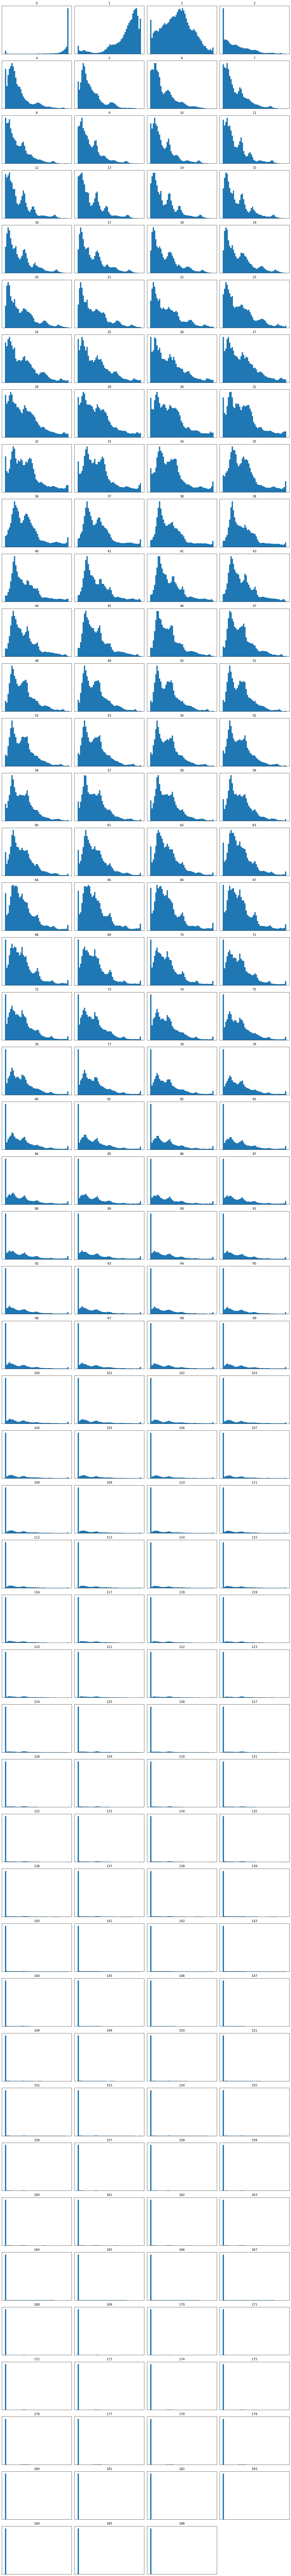

In [11]:
import matplotlib.pyplot as plt
import math

num_columns = X.shape[1]
cols =
rows = math.ceil(num_columns / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

for i, column in enumerate(X.columns):
    axes[i].hist(X[column], bins=50)
    axes[i].set_title(f'{column}')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Distribution of Labels

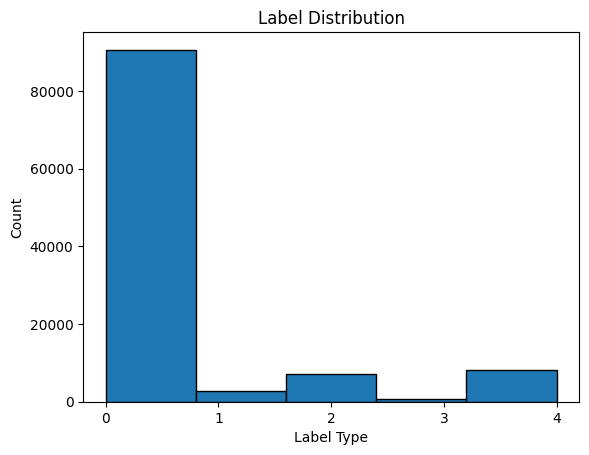

In [12]:
plt.figure()
plt.hist(df[187], bins=5, edgecolor='black')
plt.title('Label Distribution')
plt.xlabel('Label Type')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4])
plt.show()


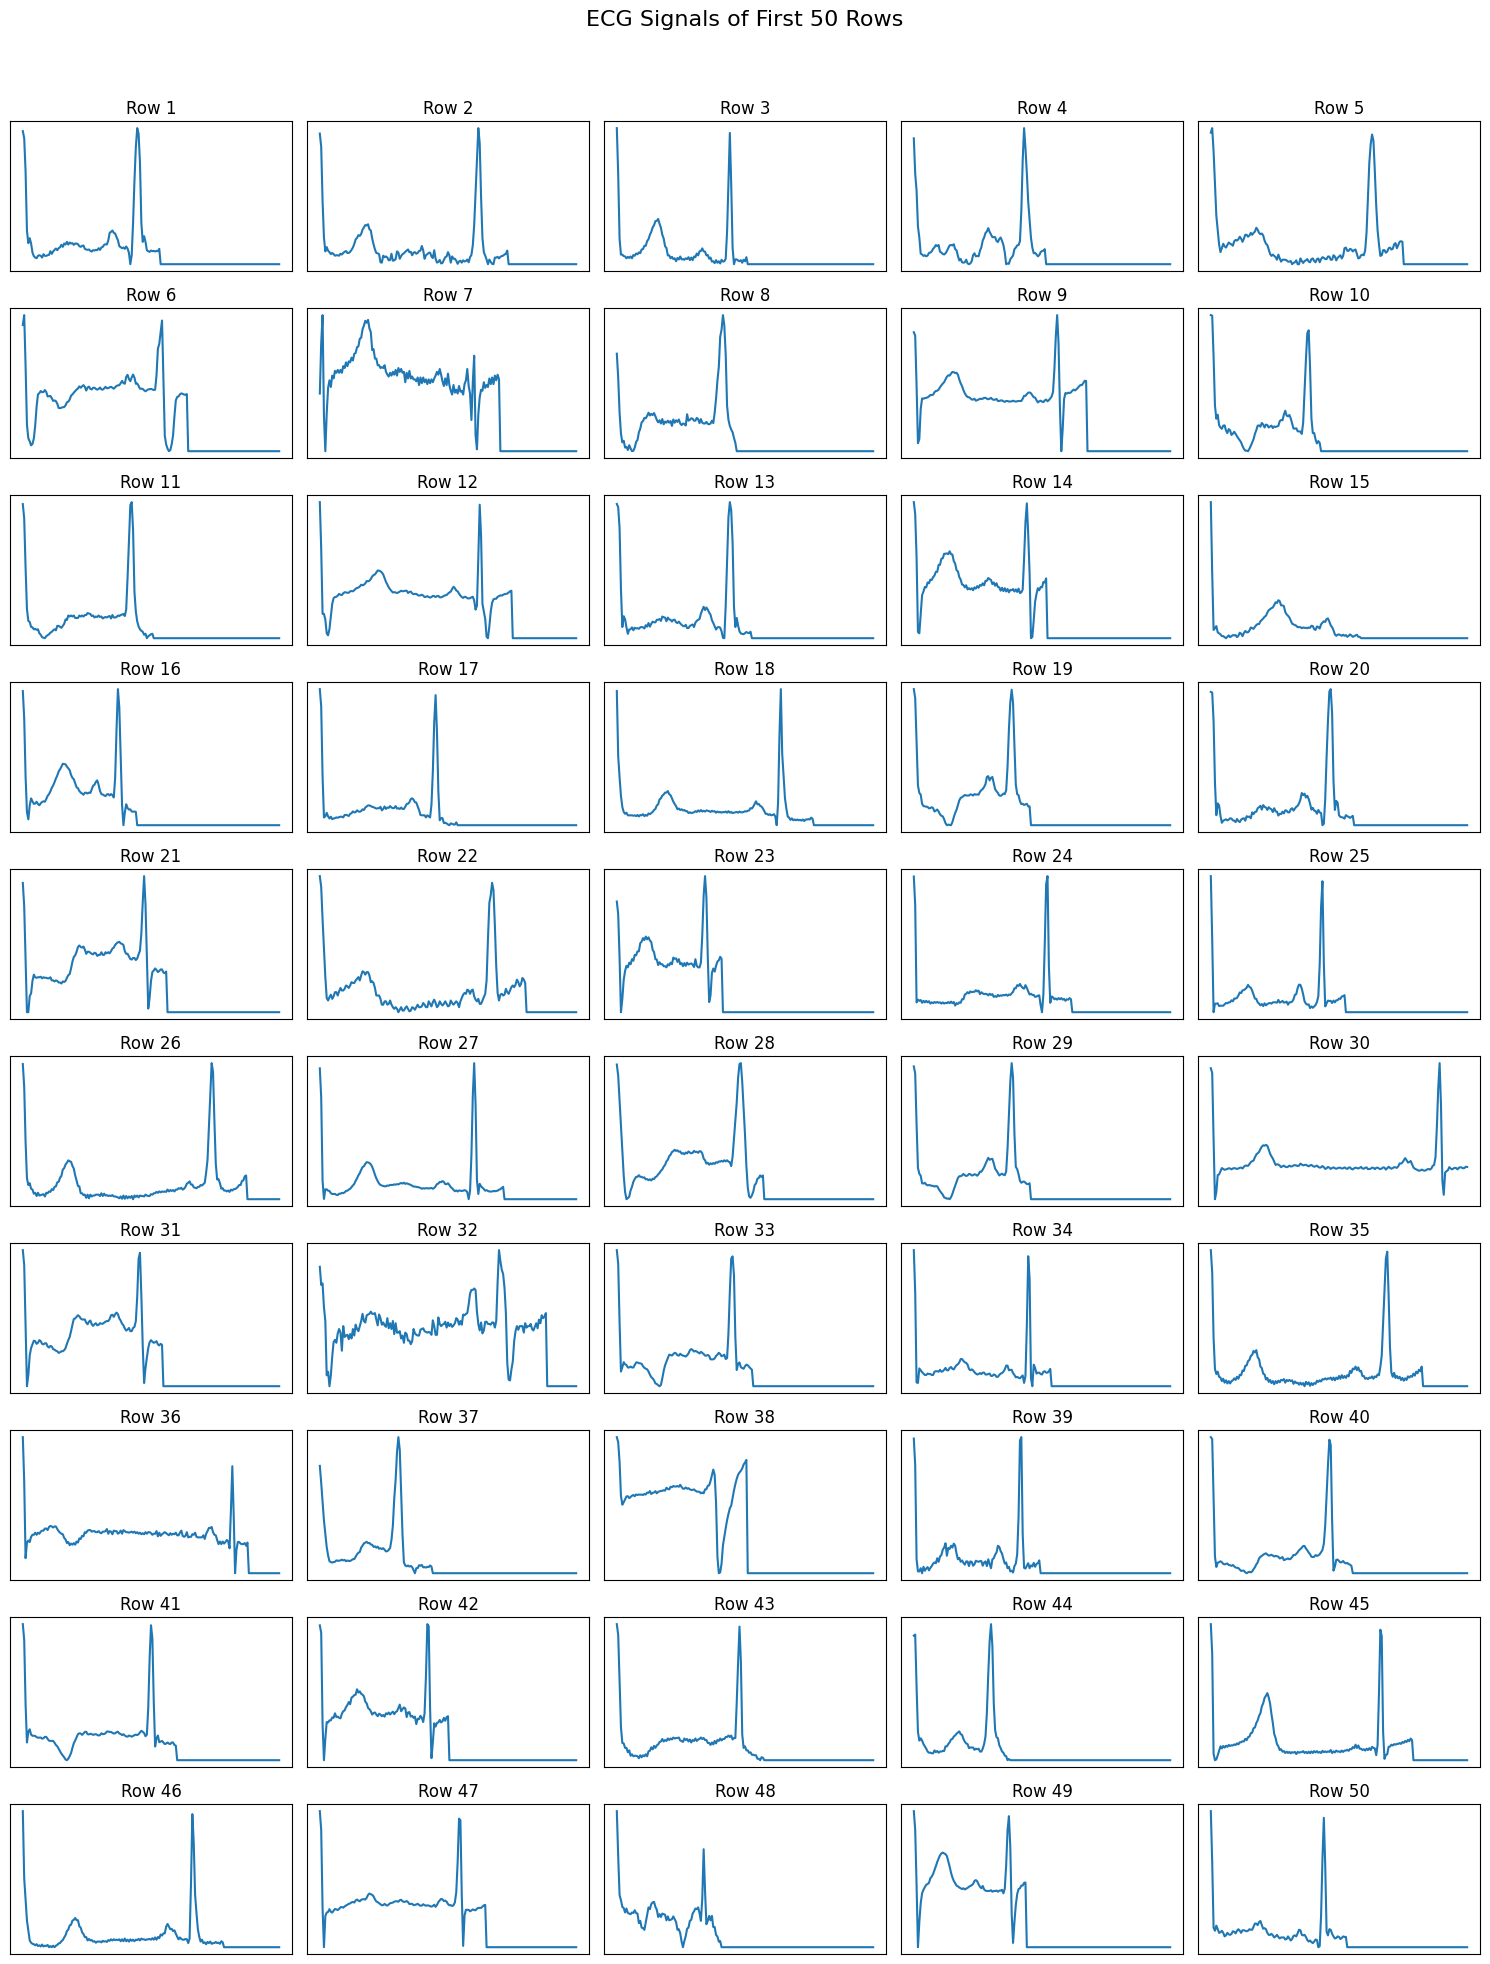

In [13]:
import matplotlib.pyplot as plt

first_50_rows = df.head(50)

fig, axes = plt.subplots(10, 5, figsize=(15, 20))
fig.suptitle("ECG Signals of First 50 Rows", fontsize=16)


for i, ax in enumerate(axes.flat):
    ax.plot(first_50_rows.iloc[i, :-1])
    ax.set_title(f"Row {i+1}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Correlation Matrix Heatmap

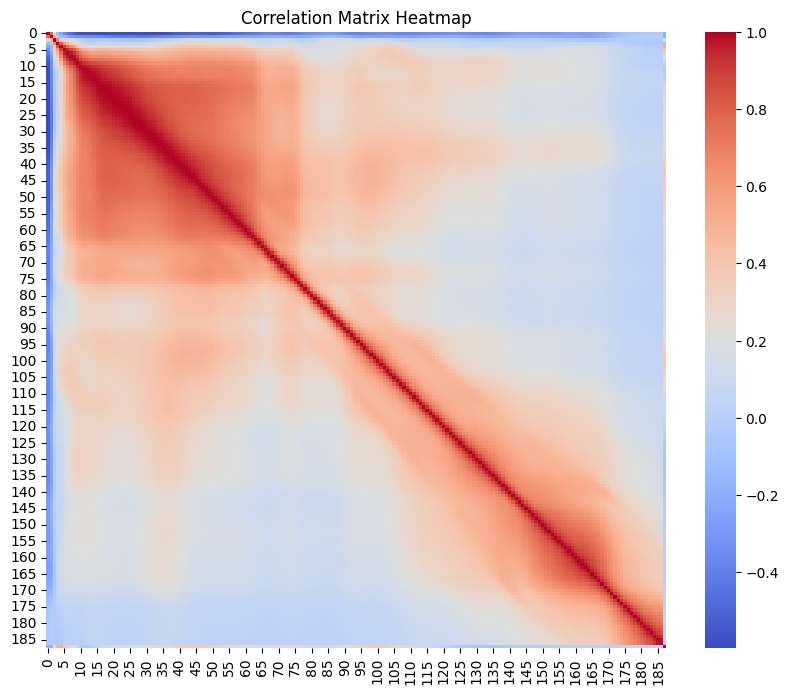

In [17]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

##  Balancing Data with SMOTE

Class Distribution after SMOTE:
 187
0.0    90589
1.0    90589
2.0    90589
3.0    90589
4.0    90589
Name: count, dtype: int64


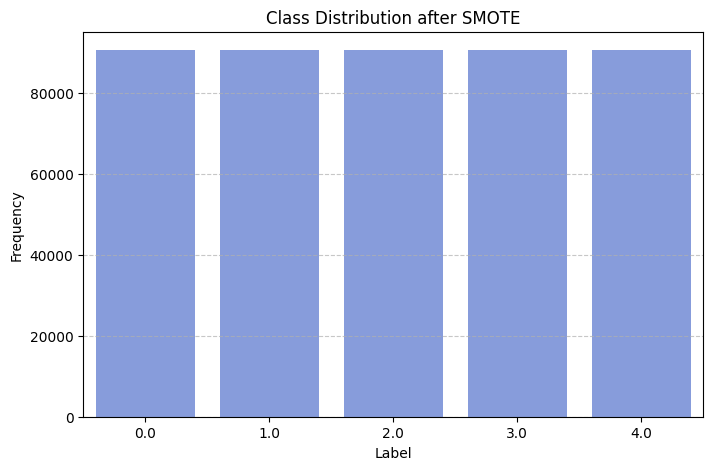

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, :-1], df.iloc[:, -1]

X_smote, y_smote = SMOTE(random_state=42).fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

print("Class Distribution after SMOTE:\n", y_smote.value_counts())

plt.figure(figsize=(8, 5))
sns.barplot(x=y_smote.value_counts().index, y=y_smote.value_counts().values, color='royalblue', alpha=0.7)
plt.title('Class Distribution after SMOTE')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Train Model

In [30]:
import xgboost as xgb
model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.9897007362924859
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     18044
         1.0       0.98      0.99      0.98     18023
         2.0       0.99      0.99      0.99     18233
         3.0       0.99      1.00      0.99     18090
         4.0       1.00      1.00      1.00     18199

    accuracy                           0.99     90589
   macro avg       0.99      0.99      0.99     90589
weighted avg       0.99      0.99      0.99     90589



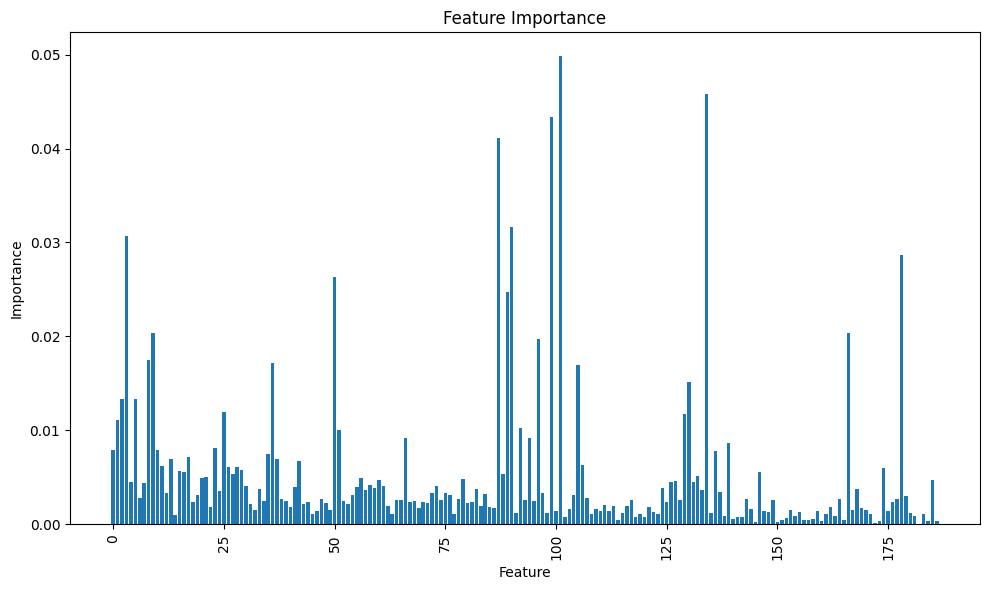

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
